In [ ]:
## 1-Chargement et exploration des donnees
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture des donnees

df = pd.read_csv('creditcard.csv')

# Affichage des premieres lignes du dataframe

print(df.head())

# Affichage des dimensions du dataset

print(f"Nombre de lignes: {df.shape[0]}, Nombre de colonnes: {df.shape[1]}")

## 2-Comprehension de la structure des donnees

# Apercu des informations generales sur les donnees

print(df.info())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

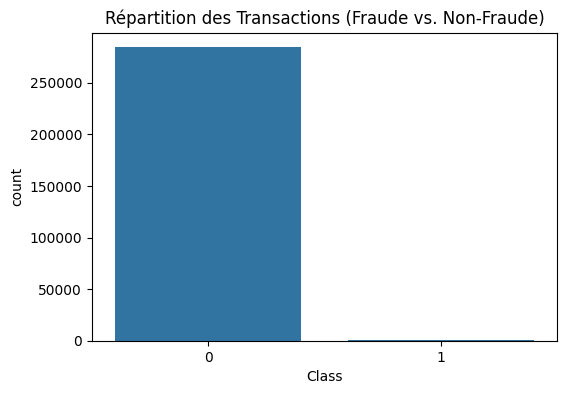

Fraude: 0.1727%, Non-Fraude: 99.8273%


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher la répartition des classes
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Répartition des Transactions (Fraude vs. Non-Fraude)")
plt.show()

# Calcul du ratio de fraude
fraud_ratio = df['Class'].value_counts(normalize=True) * 100
print(f"Fraude: {fraud_ratio[1]:.4f}%, Non-Fraude: {fraud_ratio[0]:.4f}%")

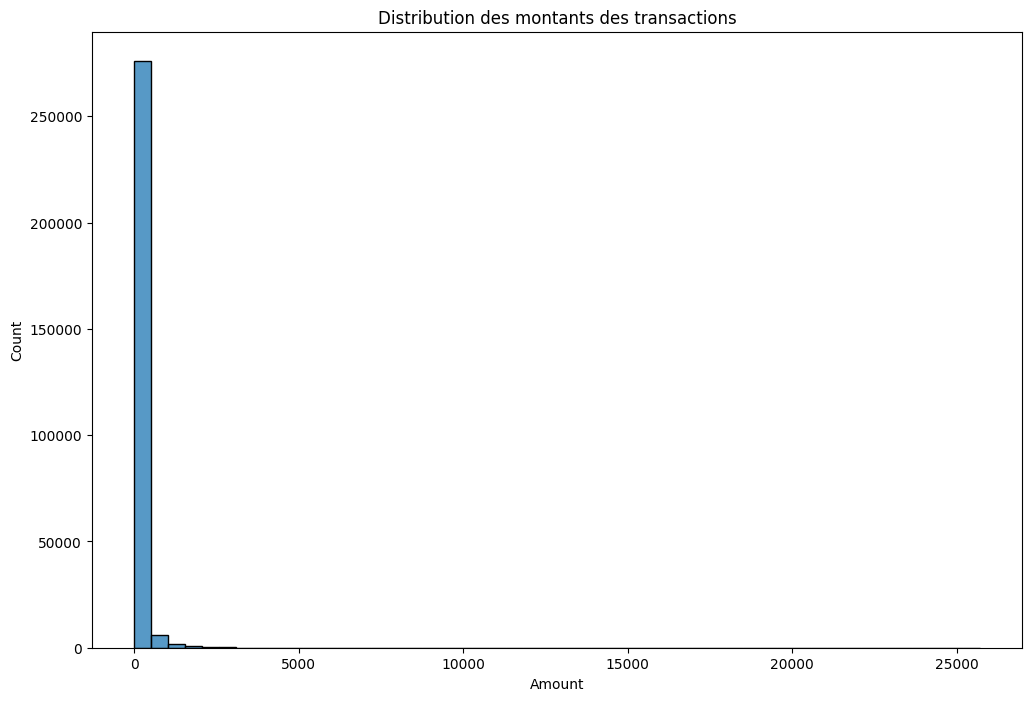

Ce graphique montre que la plupart des transactions sont de petits montants. Il y'a quelques transactions de montants très élevés.


In [25]:
## 3-Analyse Univariée

# Analyse de la variable Amount

plt.figure(figsize=(12, 8))
sns.histplot(df['Amount'], bins=50, kde=False)
plt.title("Distribution des montants des transactions")
plt.show()

print(f"Ce graphique montre que la plupart des transactions sont de petits montants. Il y'a quelques transactions de montants très élevés.")

In [20]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

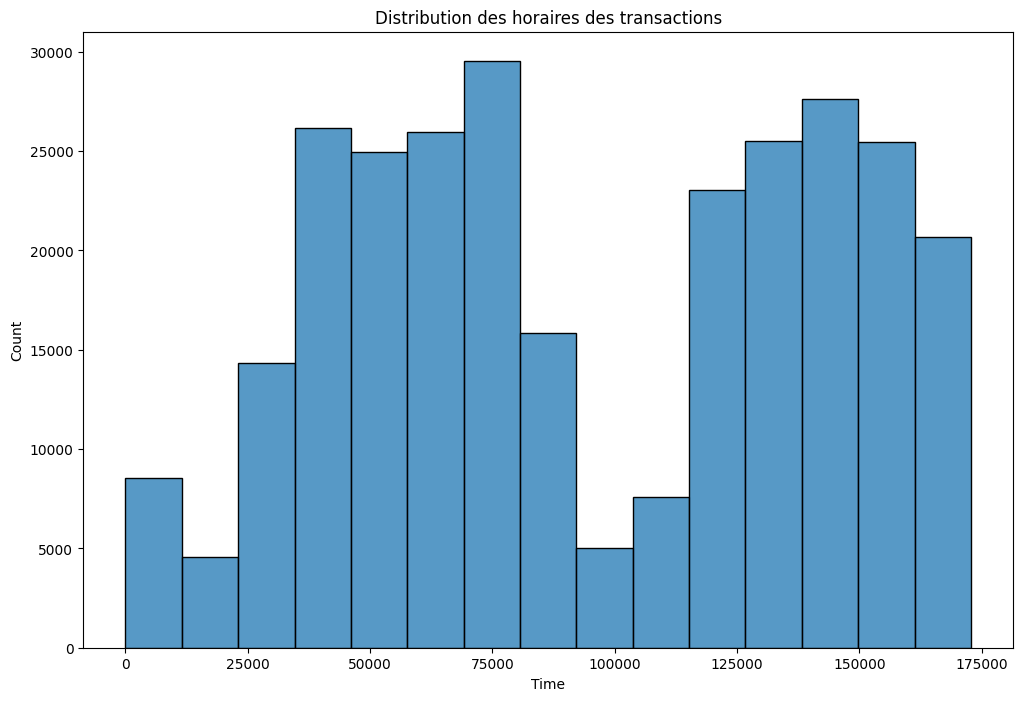

Ce graphique montre la distribution des transactions en fonction du temps. On peut voir que les transactions sont plus fréquentes pendant la journée et moins fréquentes pendant la nuit.


In [26]:
# Analyse de la variable Time

plt.figure(figsize=(12, 8))
sns.histplot(df['Time'], bins=15, kde=False)
plt.title("Distribution des horaires des transactions")
plt.show()

print(f"Ce graphique montre la distribution des transactions en fonction du temps. On peut voir que les transactions sont plus fréquentes pendant la journée et moins fréquentes pendant la nuit.")

 L'objectif est d'identifier les relations fortes entre les variables.


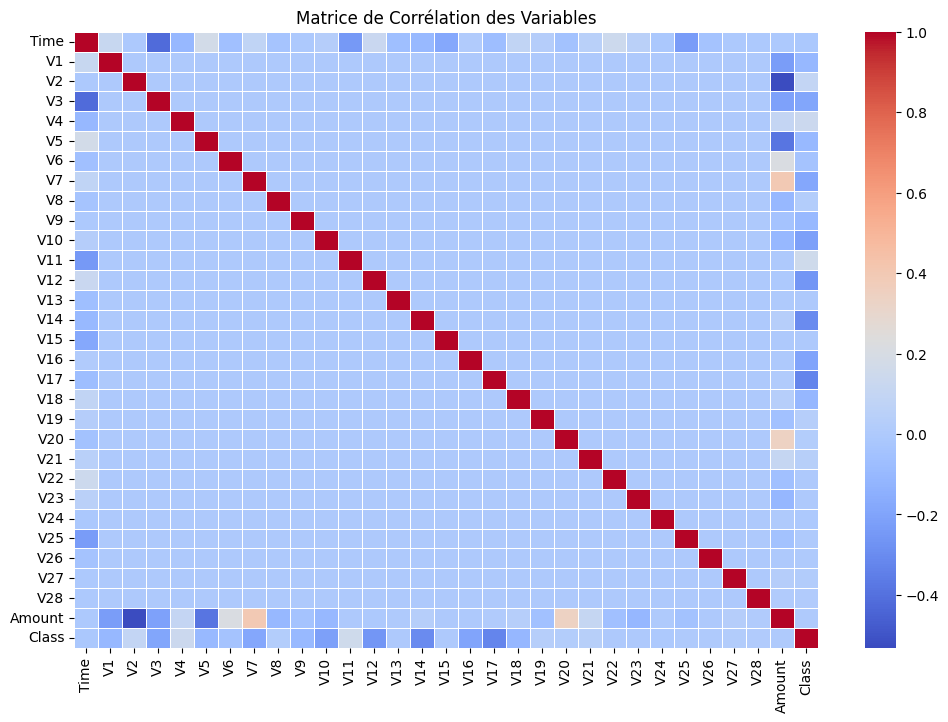

 La variable Time est faiblement corrélée à la variable V3. En effet, Time augmente lorsque V3 diminue. S'agissant de la variable Amount, elle est faiblement corrélée aux variables V2, V5, V7 et V20. En effet, Amount augmente lorsque les variables V7 et V20 augmentent et diminue lorsque les variables V2 et V5 augmente. La variable Class n'est corrélée aux variables.


In [31]:
## 4-Analyse bivariée

# Matrice de corrélation

print(f" L'objectif est d'identifier les relations fortes entre les variables.")

import numpy as np

corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de Corrélation des Variables")
plt.show()

print(f" La variable Time est faiblement corrélée à la variable V3. En effet, Time augmente lorsque V3 diminue. S'agissant de la variable Amount, elle est faiblement corrélée aux variables V2, V5, V7 et V20. En effet, Amount augmente lorsque les variables V7 et V20 augmentent et diminue lorsque les variables V2 et V5 augmente. La variable Class n'est corrélée aux variables.")


On cherche à voir si les transactions frauduleuses ont tendance à avoir des montants plus élevés.


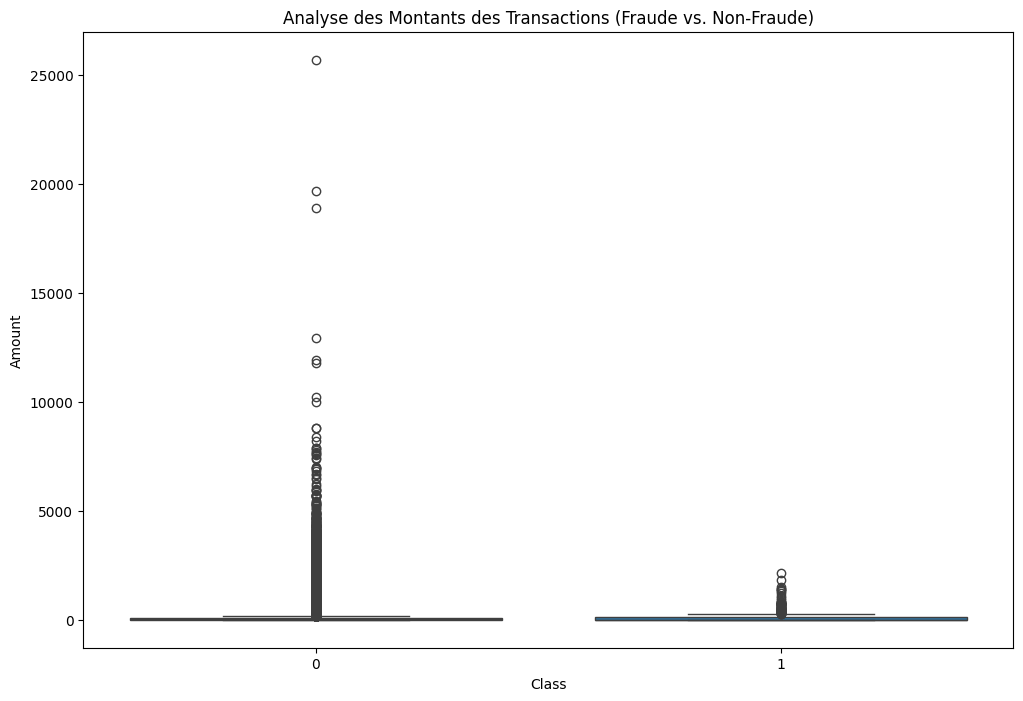

Le graphique montre que les transactions frauduleuses ont tendance à avoir des montants similaires en moyenne que les transactions non frauduleuses. Il faut quand même noter qu'il y'a une nombre non negligeable de transactions non fauduleuses avec des montants très élevés.


In [38]:
# Comparaison des distributions des transactions frauduleuses vs. non frauduleuses

print(f"On cherche à voir si les transactions frauduleuses ont tendance à avoir des montants plus élevés.")

# Class  et Amount

plt.figure(figsize=(12, 8))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Analyse des Montants des Transactions (Fraude vs. Non-Fraude)")
plt.show()

print(f"Le graphique montre que les transactions frauduleuses ont tendance à avoir des montants similaires en moyenne que les transactions non frauduleuses. Il faut quand même noter qu'il y'a une nombre non negligeable de transactions non fauduleuses avec des montants très élevés.")


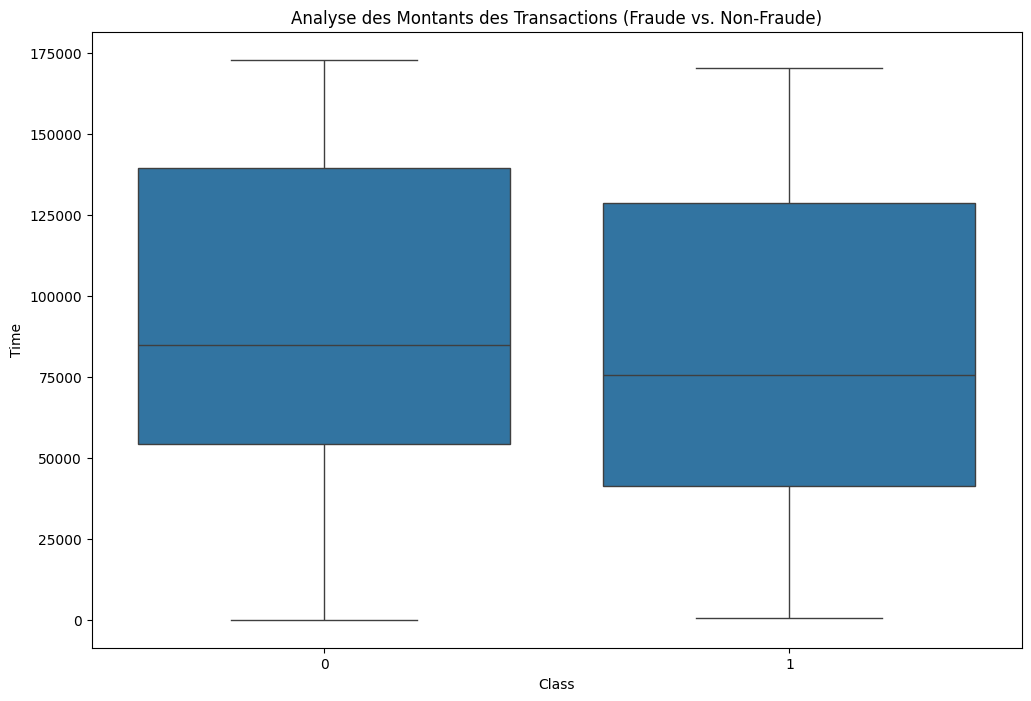

Le graphique montre que les transactions frauduleuses ont tendance à avoir lieu plus tot que les transactions non frauduleuses. La dispersion est pratiquement la même pour les deux groupes. De plus, la distribution de chacun des deux groupes est asymétrique.


In [40]:
# Class  et Time

plt.figure(figsize=(12, 8))
sns.boxplot(x="Class", y="Time", data=df)
plt.title("Analyse des Montants des Transactions (Fraude vs. Non-Fraude)")
plt.show()

print(f"Le graphique montre que les transactions frauduleuses ont tendance à avoir lieu plus tot que les transactions non frauduleuses. La dispersion est pratiquement la même pour les deux groupes. De plus, la distribution de chacun des deux groupes est asymétrique.")

In [3]:
# Statistiques descriptives des variables numeriques

print(df.drop(columns=['Class']).describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
## Nettoyage et pretraitement des donnees

# Verification des valeurs manquantes

print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


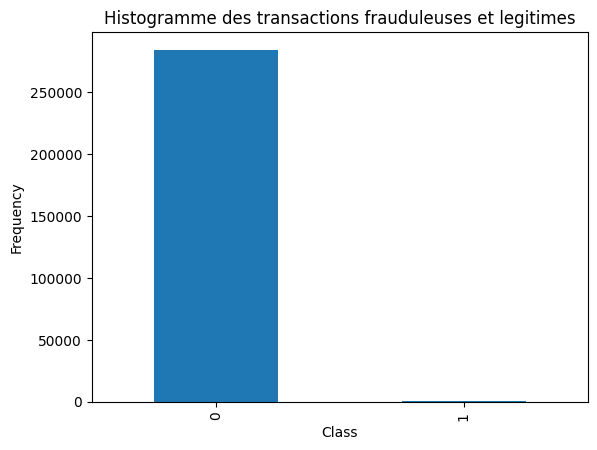

In [5]:
## Analyse univariee et bivariee

# Distribution de la variable cible

df['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Histogramme des transactions frauduleuses et legitimes')
plt.show()

In [6]:
# Affichage du tableau des effectifs de la colonne Class

print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64
